<a href="https://colab.research.google.com/github/ali-ihssan/Machine-learning-class/blob/main/Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning
Deep learning is about building large scale neural networks. The simplest form of neural network is called multilayer perceptron model. The building block for neural networks are artificial neurons or perceptrons. These are simple computational units that have weighted input signals and produce an output signal using an activation function.

Perceptrons are arranged into networks. A row of perceptrons is called a layer and one network can have multiple layers. The architecture of the perceptrons in the network is often called the network topology. Once configured, the neural network needs to be trained on your dataset. The classical and still preferred training algorithm for neural networks is called stochastic gradient descent.

In this tutorial we will look at :

*   Building a single layer neural network with PyTorch
*   Training a single layer neural network
*   Using a neural network to classify data

We will write code that generates synthetic data X and assigns corresponding labels Y for a classification problem with two classes. Shuffle the data before analysis

In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

# create a dummy datasets with two classes
n = 300
W1 = np.random.normal(1, 0.5, n)
W2 = np.random.normal(1, 0.2, n)
Y1 = np.zeros([len(W1), ])        # class 0

Z1 = np.random.normal(2, 0.5, n)
Z2 = np.random.normal(2, 0.2, n)
Y2 = np.ones([len(Z1), ])         # class 1

# concatenate the two datasets
X1 = np.concatenate([W1, Z1])
X1 = np.float32(X1)
X2 = np.concatenate([W2, Z2])
X2 = np.float32(X2)
Y = np.concatenate([Y1, Y2])
Y = np.float32(Y)
df = pd.DataFrame({'x1': X1, 'x2': X2, 'y':Y})  #create a dataframe

# shuffle
df = shuffle(df)


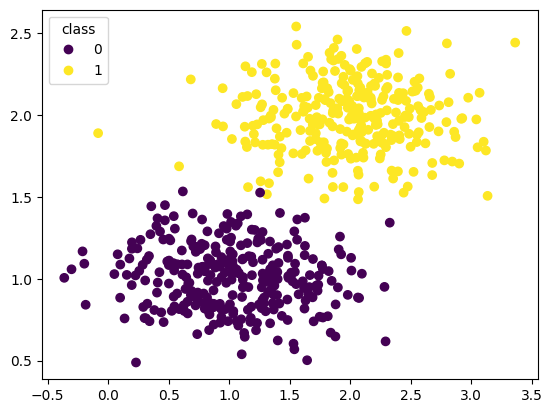

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
scatter = plt.scatter(df['x1'], df['x2'], c=df['y'])
plt.legend(handles=scatter.legend_elements()[0],
           labels=['0', '1'],
           title="class")

## BUILD THE MODEL WITH THE PYTORCH nn.MODULE

nn.Module is a fundamental class in PyTorch used to create custom neural network architectures. It is a base class for all neural network modules in PyTorch, and it provides several essential functionalities for building and managing neural networks.

When creating a custom neural network in PyTorch, you typically create a subclass of nn.Module and define the architecture by specifying the layers and operations that make up your neural network.

Here is how your single layer neural network looks like in code:

In [ ]:
import torch

class SingleLayerNet(torch.nn.Module):
    def __init__(self, input_size, hidden_neurons, output_size):
        super(SingleLayerNet, self).__init__()
        # Define the hidden layer with input_size input features and hidden_neurons neurons
        self.hidden_layer = torch.nn.Linear(input_size, hidden_neurons)

        # Define the output layer with hidden_neurons input features and output_size neurons
        self.output_layer = torch.nn.Linear(hidden_neurons, output_size)

#Define a Prediction Function
    def forward(self, x):
        # Pass the input through the hidden layer and apply the sigmoid activation function
        hidden_output = torch.sigmoid(self.hidden_layer(x))

        # Pass the hidden layer output through the output layer and apply the sigmoid activation function
        y_pred = torch.sigmoid(self.output_layer(hidden_output))

        return y_pred

In [ ]:
learningRate = 0.01
epochs = 5000

model = SingleLayerNet(2, 2, 1)  #input_size, hidden_neuron, output_size
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [ ]:
criterion = torch.nn.BCELoss()   #Binary Cross Entropy loss
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)


In [ ]:
from torch.autograd import Variable

training_loss = []


for epoch in range(epochs):
    inputs = df[['x1', 'x2']].to_numpy()
    labels = df['y'].to_numpy().reshape([-1, 1])

    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(inputs).cuda())
        labels = Variable(torch.from_numpy(labels).cuda())
    else:
        inputs = Variable(torch.from_numpy(inputs))
        labels = Variable(torch.from_numpy(labels))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    if epoch % 1000 == 0:
      print('epoch {}, loss {}'.format(epoch, loss.item()))

    training_loss.append(loss.item())

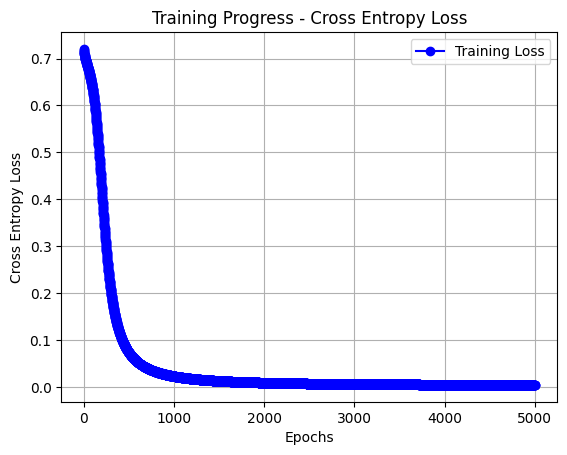

In [ ]:
# Plot the cost (loss) over epochs
plt.plot(training_loss, marker='o', linestyle='-', color='b', label='Training Loss')

# Set labels and title
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Training Progress - Cross Entropy Loss')

# Add grid for better readability
plt.grid(True)

# Show legend
plt.legend()

# Display the plot
plt.show()

Text(0, 0.5, 'x2')

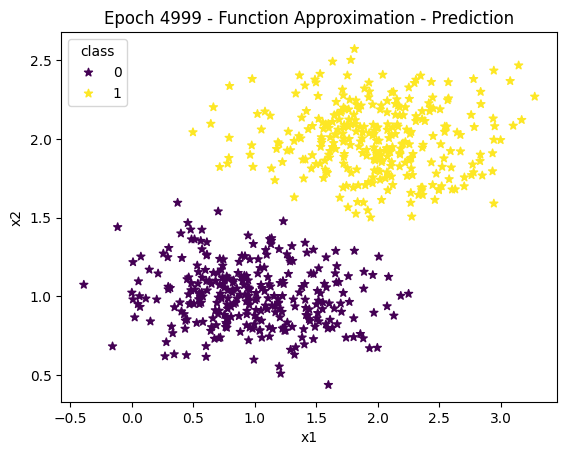

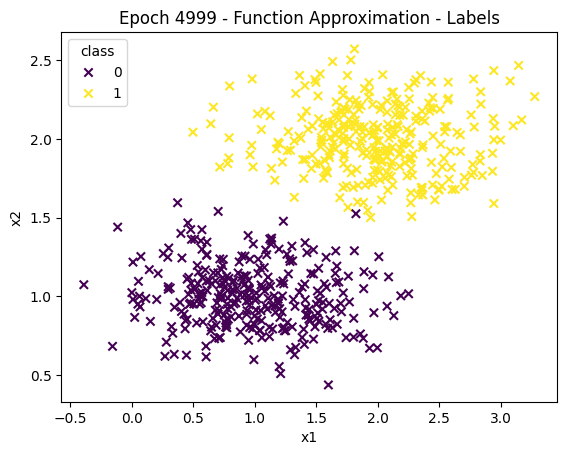

In [ ]:
# Plot the result of the function approximator
inputs = df[['x1', 'x2']].to_numpy()
labels = df['y'].to_numpy().reshape([-1, 1])

X_tensor = torch.tensor(inputs)
y_pred = model(X_tensor).detach().numpy()
y_pred = np.round(y_pred, 0)

scatter_pred = plt.scatter(df['x1'], df['x2'], marker='*', c=y_pred)
plt.legend(handles=scatter_pred.legend_elements()[0],
           labels=['0', '1'],
           title="class")
plt.title(f'Epoch {epoch} - Function Approximation - Prediction')
plt.xlabel('x1')
plt.ylabel('x2')

plt.figure()
scatter_label = plt.scatter(df['x1'], df['x2'], marker='x', c=df['y'])
plt.legend(handles=scatter_label.legend_elements()[0],
           labels=['0', '1'],
           title="class")
plt.title(f'Epoch {epoch} - Function Approximation - Labels')
plt.xlabel('x1')
plt.ylabel('x2')



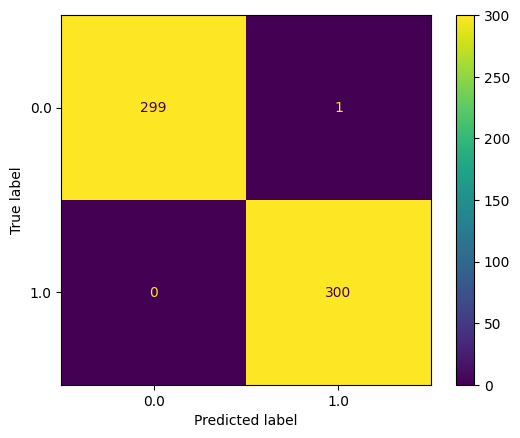

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
X_tensor = torch.tensor(inputs)
y_pred = model(X_tensor).detach().numpy()
y_pred = np.round(y_pred, 0)

y_true = df['y']

cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(y_true))
disp.plot()
plt.show()

# Reference

1.   https://medium.com/@shashankshankar10/introduction-to-neural-networks-build-a-single-layer-perceptron-in-pytorch-c22d9b412ccf
2.   https://medium.com/@reddyyashu20/deep-learning-with-pytorch-780be96b2819

